In [1]:
import pandas as pd
from Data_Preprocessing import Data_Preprocessing
from ModelSummary import ModelSummary

pd.set_option('display.max_columns', None)

# Dataset Preparation / Cleaning

In [2]:
# import parquet data
df = pd.read_parquet('pam_take_home_data.parquet')
# Replace 0 to No and 1 to Yes 
df['switched_to_hdhp'] = df['switched_to_hdhp'].replace({0:'No', 1:'Yes'})

df_pam = df.copy()
df_pam.drop('id', axis=1, inplace=True)

In [3]:
# create an instance of Data_Preprocessing
pam_data_prep = Data_Preprocessing(df_pam)

### Dataset Properties

In [4]:
pam_data_prep.get_dataset_properties()

,Rows,Columns,% Duplicate Rows,Target Column,% Missing Target Values
0,20000,18,0.325,switched_to_hdhp,0.0


### Detected Column Types

In [5]:
pam_data_prep.detected_column_types()

,Variable Type,Count,Percentage
0,Numeric,13,0.722222
1,Categorical,5,0.277778
2,Text,0,0.000000
3,Datetime,0,0.000000
4,Sequence,0,0.000000


### Data Cleaning

In [6]:
# convert categorical columns to categorical data types
df_pam = pam_data_prep.convert_categorical_columns()

# create columns to track missing/imputed observations
df_pam = pam_data_prep.missing_rows_and_columns()

### Visualize

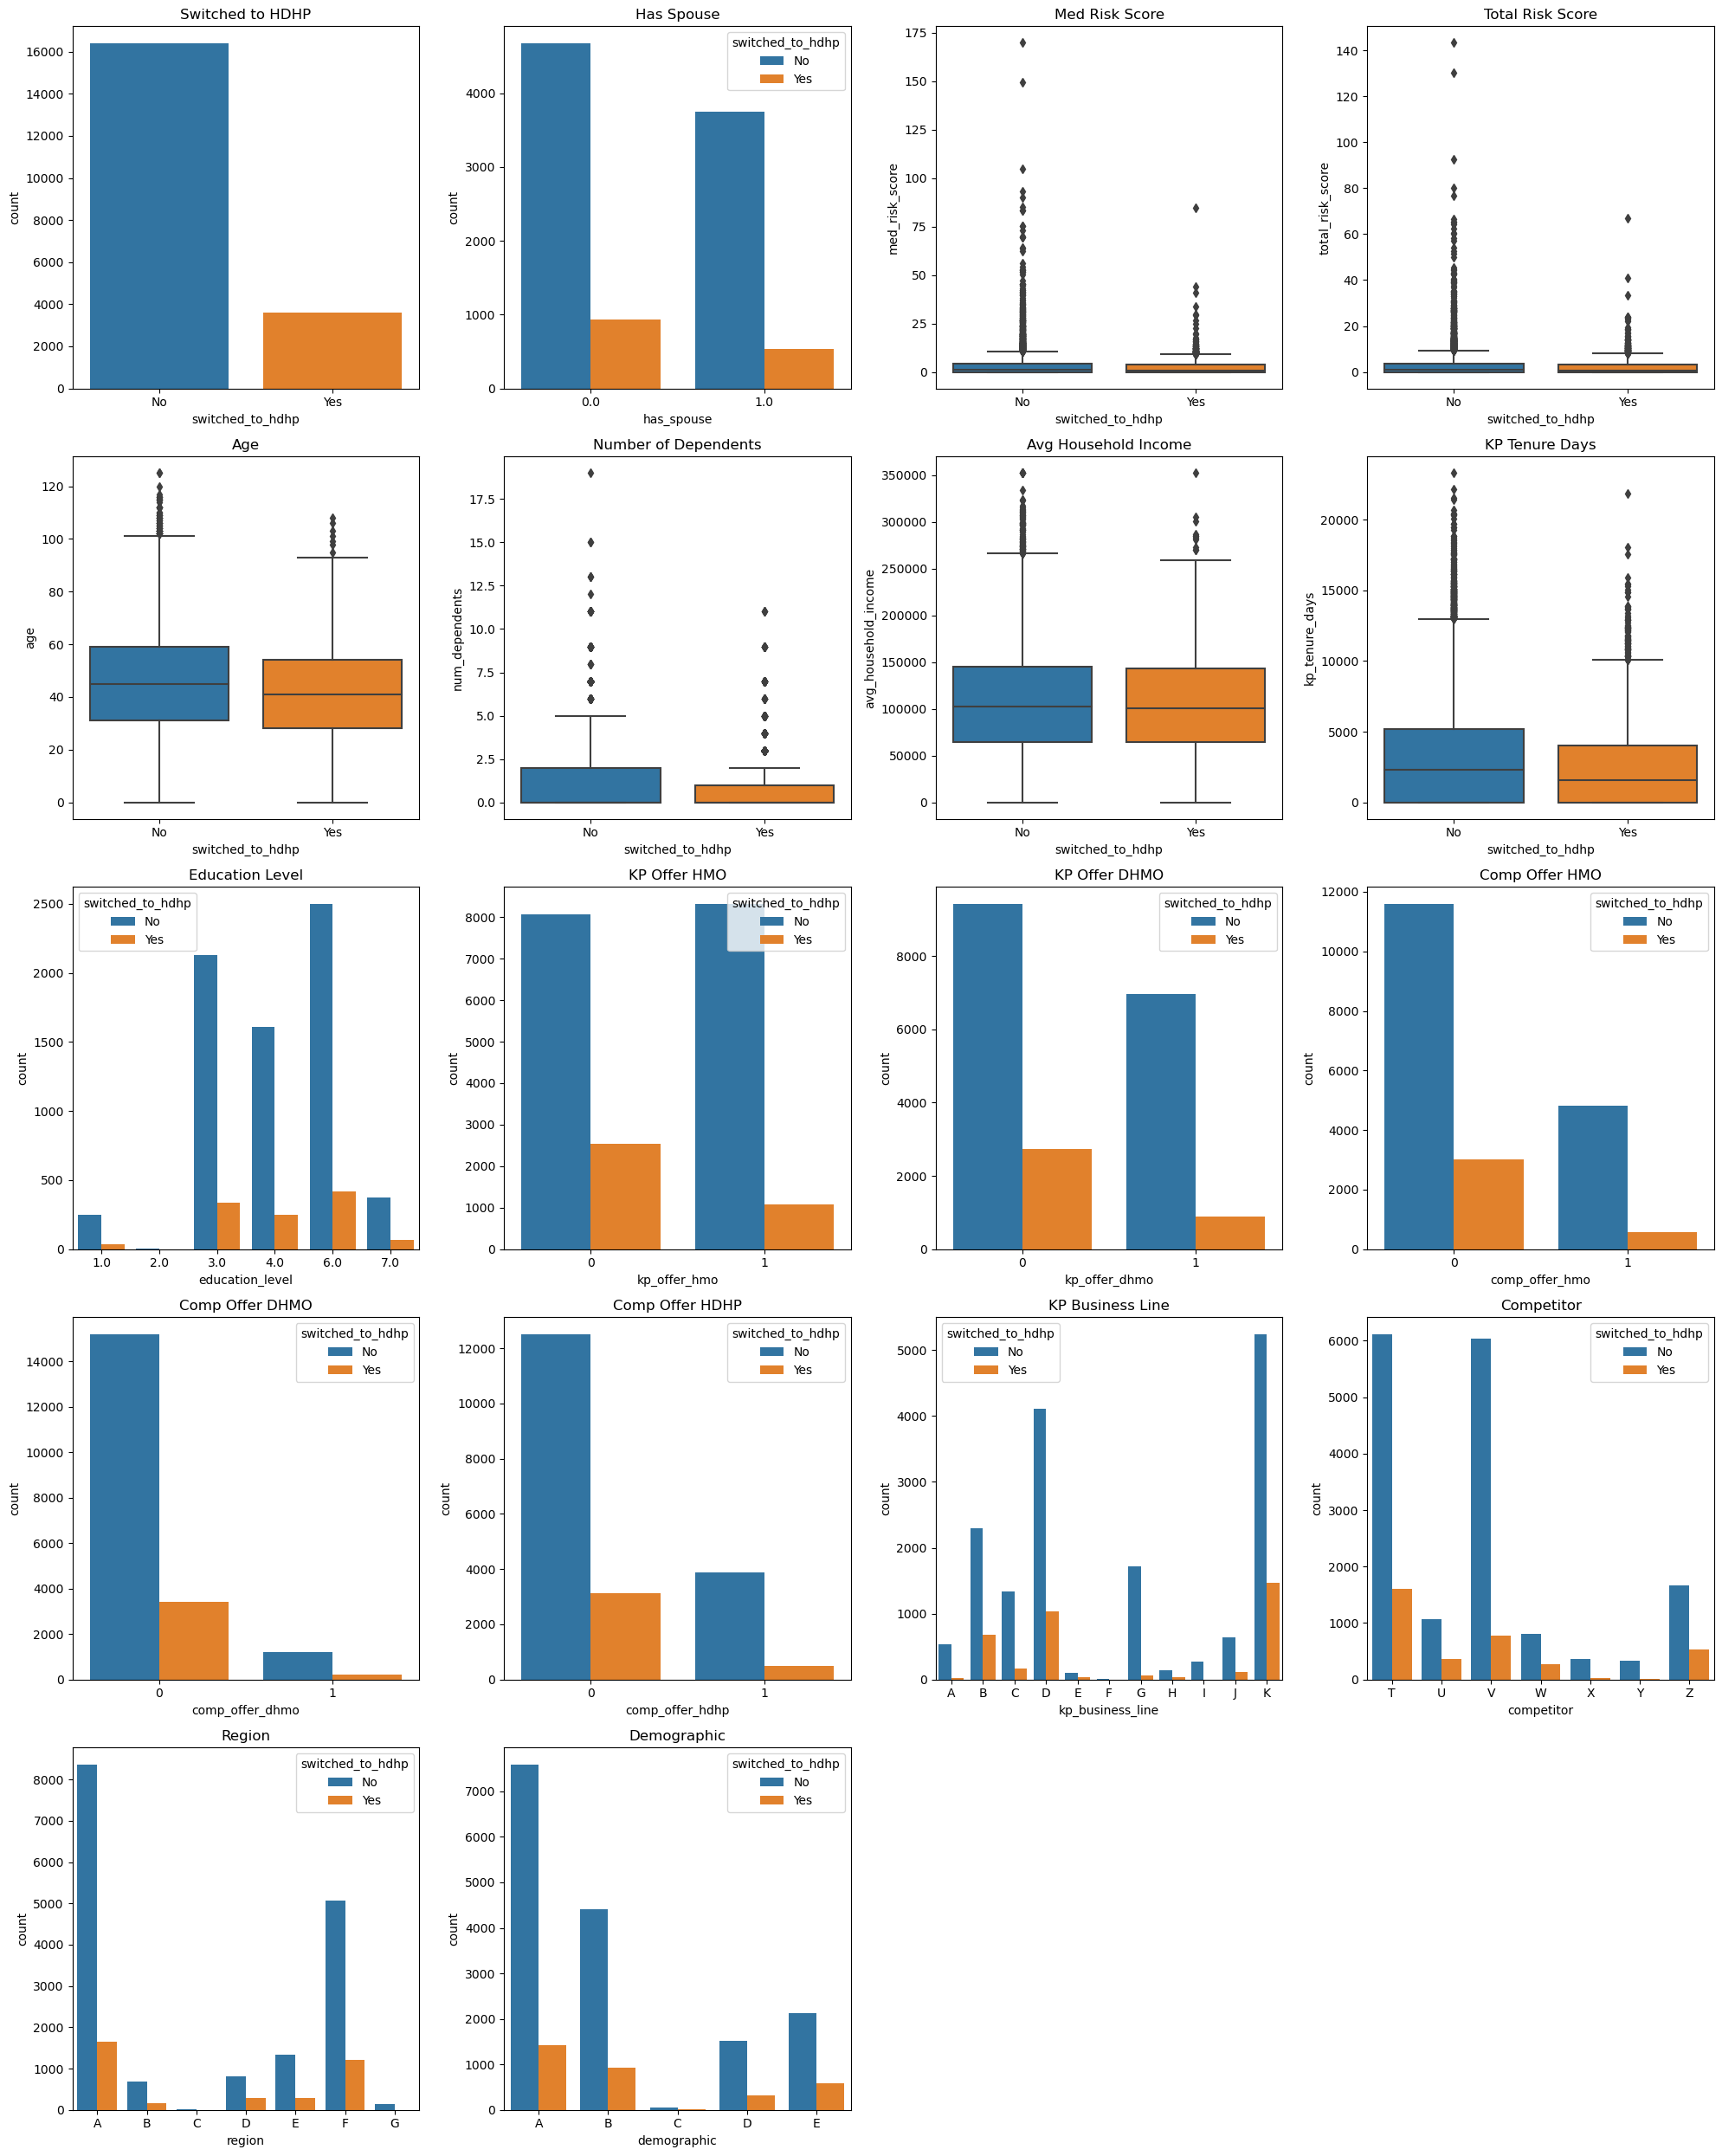

In [7]:
pam_data_prep.EDA_Plots()

### Missing Values

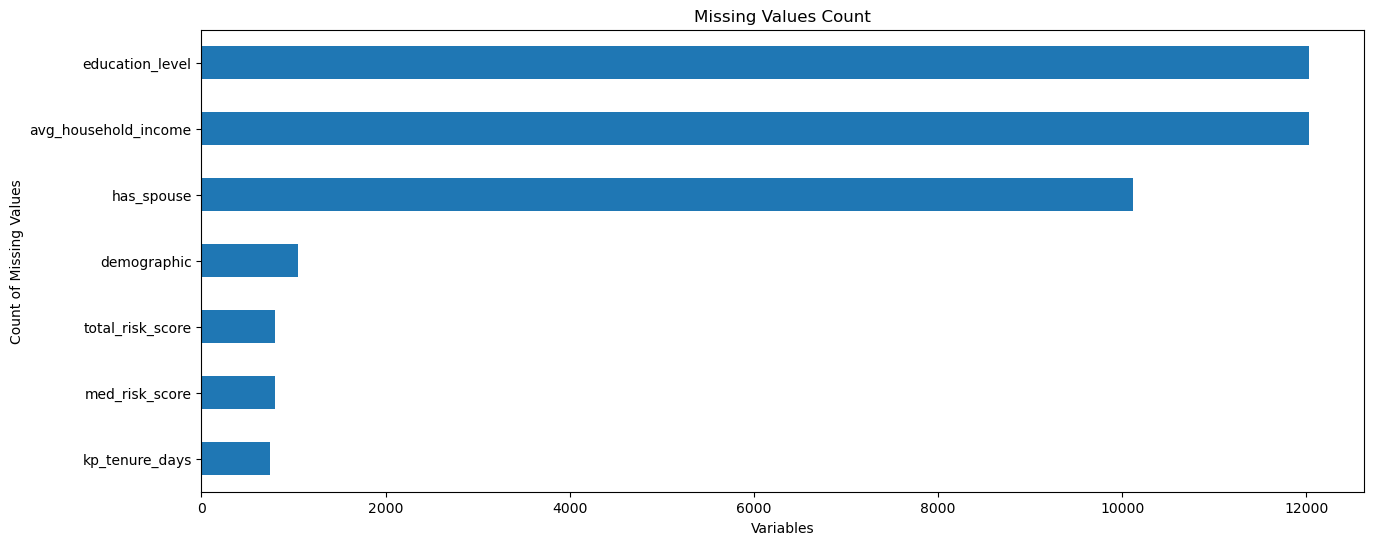

In [8]:
pam_data_prep.Missing_Features()

#### Impute Missing Values

In [9]:
# replace the missing values with the mode
df_pam = pam_data_prep.impute_mode('education_level')
df_pam = pam_data_prep.impute_mode('demographic')

# impute has_spouse missing values using IterativeImputer
df_pam = pam_data_prep.impute_IterativeImputer()

# update if the imputed value is above 0.5, set to 1
df_pam['has_spouse'] = df_pam['has_spouse'].apply(lambda x: 1 if x > 0.5 else 0)


#### Scale Numericals

In [10]:
# take the log to create linear relationship 
numerical_vars = [ 'med_risk_score', 'total_risk_score', 'num_dependents',
                 'age','num_dependents','avg_household_income', 'kp_tenure_days']

df_pam = pam_data_prep.scale_numerical_variables(numerical_vars)

In [11]:
### visualize data post imputation and scaling

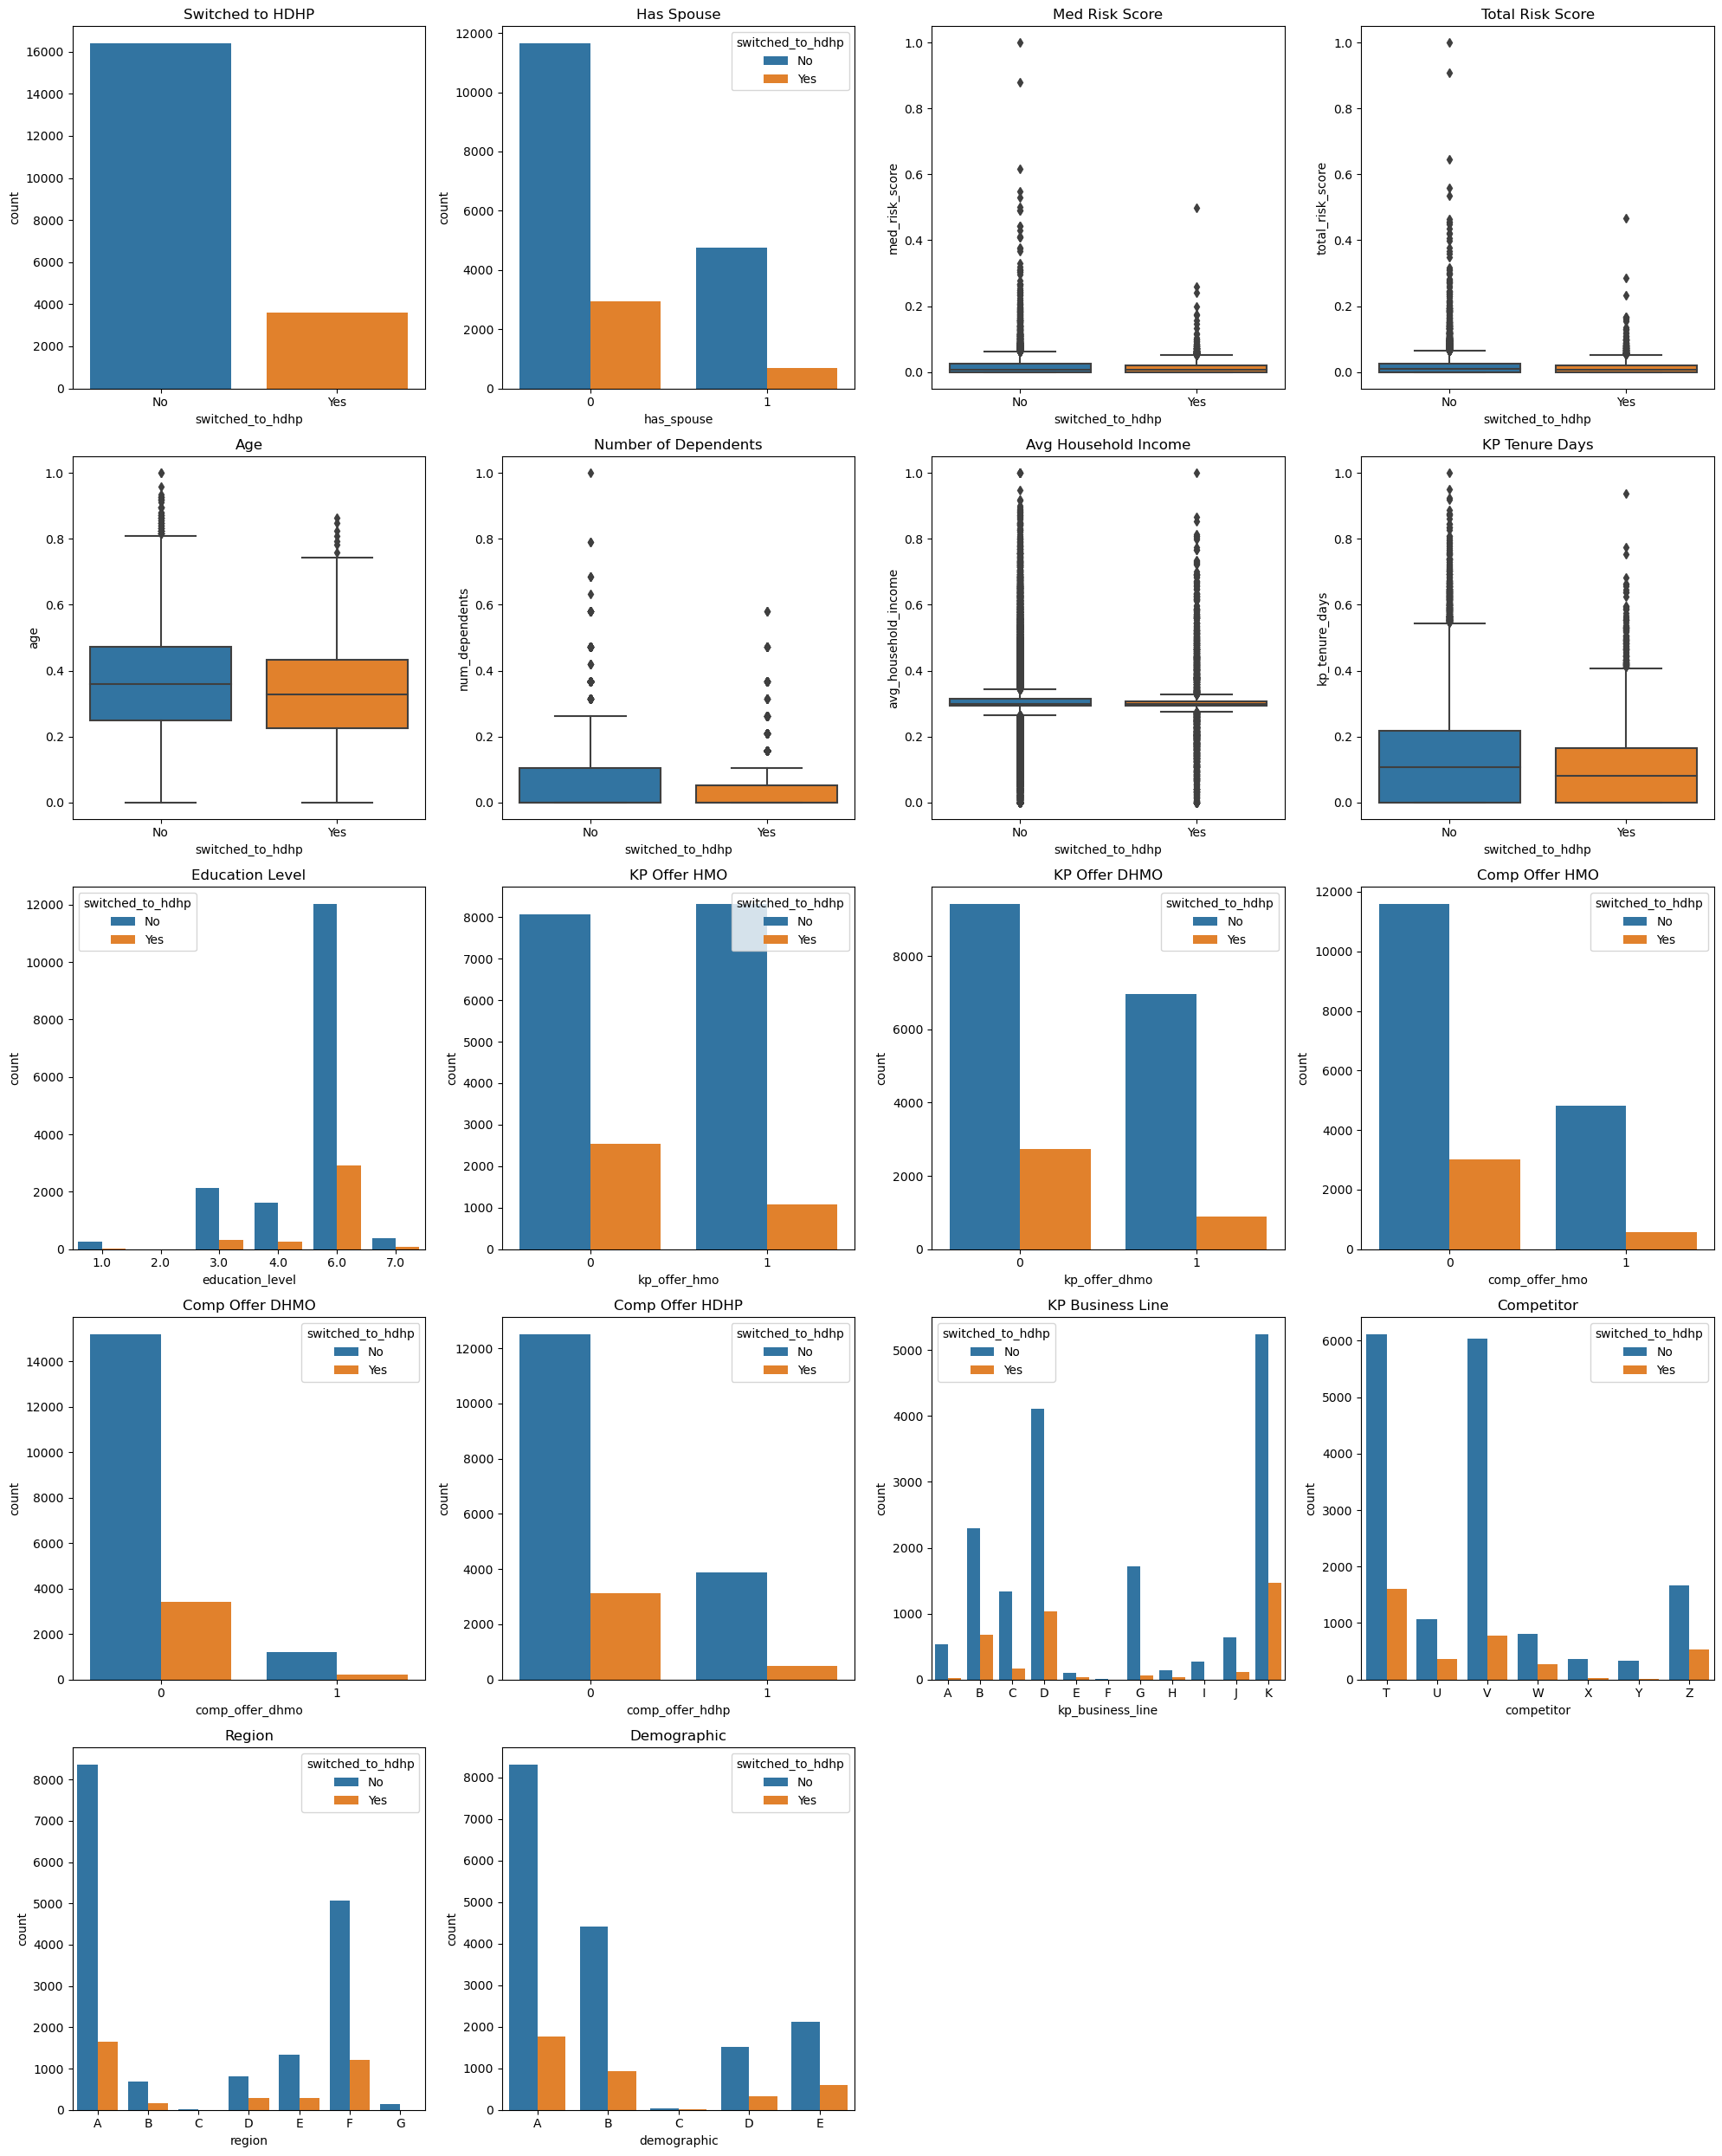

In [12]:
pam_data_prep.EDA_Plots()

In [13]:
missing_cnt = df_pam.isna().sum().sum()
print("Count of Missing Data After Imputation: {}".format(missing_cnt))

Count of Missing Data After Imputation: 0


### Correlation Matrix

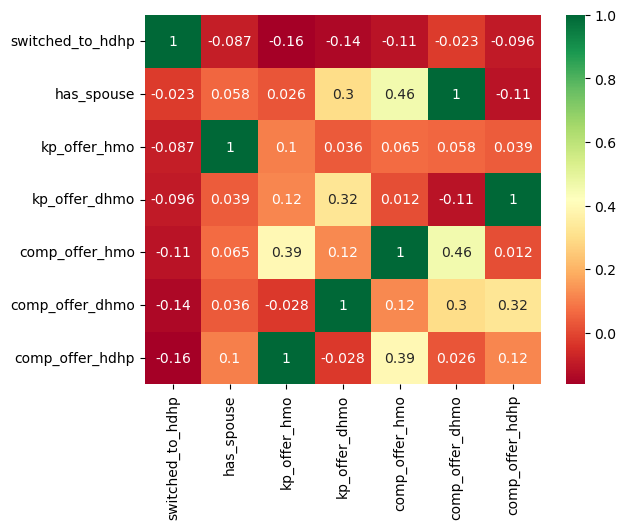

In [14]:
pam_data_prep.corr_data()

### One Hot Encode Categorical Data

In [15]:
category_cols =['education_level','demographic','region','kp_business_line','competitor']
df_pam = pam_data_prep.One_Hot_Encode(category_cols)

In [16]:
### reset switched_to_hdhp to int for modeling
df_pam['switched_to_hdhp'] = df_pam['switched_to_hdhp'].factorize()[0]

In [17]:
df_pam.head()

,age,switched_to_hdhp,med_risk_score,total_risk_score,has_spouse,num_dependents,avg_household_income,kp_tenure_days,kp_offer_hmo,kp_offer_dhmo,comp_offer_hmo,comp_offer_dhmo,comp_offer_hdhp,imputed_med_risk_score,imputed_total_risk_score,imputed_has_spouse,imputed_avg_household_income,imputed_kp_tenure_days,imputed_education_level,imputed_demographic,education_level_1.0,education_level_2.0,education_level_3.0,education_level_4.0,education_level_6.0,education_level_7.0,demographic_A,demographic_B,demographic_C,demographic_D,demographic_E,region_A,region_B,region_C,region_D,region_E,region_F,region_G,kp_business_line_A,kp_business_line_B,kp_business_line_C,kp_business_line_D,kp_business_line_E,kp_business_line_F,kp_business_line_G,kp_business_line_H,kp_business_line_I,kp_business_line_J,kp_business_line_K,competitor_T,competitor_U,competitor_V,competitor_W,competitor_X,competitor_Y,competitor_Z
0,0.744,0,0.000000,0.001807,0,0.000000,0.273021,0.314197,1,0,1,0,1,False,False,False,False,False,False,False,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
1,0.352,0,0.033398,0.018556,0,0.000000,0.301758,0.114515,1,0,1,0,0,False,False,False,True,False,True,False,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.064,0,0.013374,0.000000,0,0.000000,0.306453,0.187712,0,0,0,0,0,False,False,False,True,False,True,False,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,0.160,0,0.000000,0.000000,0,0.000000,0.296697,0.035612,0,0,0,0,0,False,False,True,True,False,True,False,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0.464,0,0.000000,0.000000,1,0.157895,0.301417,0.109195,0,1,0,0,1,False,False,False,True,False,True,False,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0


# Modeling

In [18]:
# create instance of ModelSummary Class
model_summary = ModelSummary(df_pam.drop('switched_to_hdhp', axis=1), df_pam['switched_to_hdhp'])

## Logistic Regression Model

In [19]:
model_summary.logistic_regression()

,Model,Accuracy,Precision,Recall
In-Sample,Logistic_Regression,0.652071,0.301564,0.729577
Out-of-Sample,Logistic_Regression,0.657667,0.317573,0.714539


## Random Forest 

In [20]:
model_summary.random_forest()

,Model,Accuracy,Precision,Recall
In-Sample,Random_Forest,0.694643,0.342982,0.786720
Out-of-Sample,Random_Forest,0.688833,0.348255,0.751773


## XGBoost

In [21]:
model_summary.xgb()

,Model,Accuracy,Precision,Recall
In-Sample,XGBoost,0.865071,0.854762,0.288934
Out-of-Sample,XGBoost,0.830833,0.674923,0.193262


# Overall Model Performance - Logistic, Random Forest, XGBoost

In [22]:
model_summary.get_summary().sort_values(['index','Model'])

,index,Model,Accuracy,Precision,Recall
0,In-Sample,Logistic_Regression,0.652071,0.301564,0.729577
2,In-Sample,Random_Forest,0.694643,0.342982,0.786720
4,In-Sample,XGBoost,0.865071,0.854762,0.288934
1,Out-of-Sample,Logistic_Regression,0.657667,0.317573,0.714539
3,Out-of-Sample,Random_Forest,0.688833,0.348255,0.751773
5,Out-of-Sample,XGBoost,0.830833,0.674923,0.193262


# Remarks

### Abstract

The Logistic Regression, Random Forest, and XGBoost models can all be used to predict whether a member will switch from an HMO to a high-deductible plan. These models can be used in several business contexts, such as targeting promotional offers for HDHP plans, providing additional education and support, conducting surveys and feedback about HDHP plans, as well as informing marketing and outreach strategies, pricing, and benefit changes. Each model has its advantages and disadvantages, so it is important to consider the context and tradeoffs of using these models.   

#### Logistic Regression Model 
The Logistic Regression Model has an accuracy rate of 65.8%, a precision rate of 31.8%, and a recall rate of 71.5%. The advantages of this model are that it is easy to interpret and explain, fast to train, and not prone to overfitting, while the disadvantages are that it can underperform with complex datasets and be sensitive to outliers. This model would be the best choice if the business context requires interpretability or was for regulatory purposes.  

#### Random Forest Model
The Random Forest Model has an accuracy rate of 68.9%, a precision rate of 34.8%, and a recall rate of 75.2%. The advantages of this model are that it is robust to outliers and can handle complex datasets, and the disadvantages are that it does not perform well when there is an imbalanced dataset, which is the case here. The Random Forest Model would be ideal if the business context involves marketing, as we would be okay with a high false positive rate, so long as we capture a high proportion of members switching from an HMO to a high-deductible plan; i.e., highest recall.   

#### XGBoost Model
The XGBoost Model has an accuracy rate of 83.1%, a precision rate of 67.4%, and a recall rate of 19.3%. The advantages of this model are that it is less prone to underfitting and performs well with an imbalanced dataset, while the disadvantages are that it can be time-consuming to train and computationally expensive. That said, this model would be the best choice if the business context requires the model to be conservative yet accurate in its predictions; i.e., highest precision.

### Summary
Overall, the Random Forest Model has the best recall rate, while the XGBoost Model has the best precision rate. The Logistic Regression is the most interpretable and consistent model, determined by comparing its in-sample and out-of-sample fit. Therefore, it is important to consider the context in which the model will be used, tradeoffs of using these models, and the risk the business is willing to accept by using either one of these models, before deciding which model to use.